# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import requests as r
import json
import matplotlib.pyplot as plt

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas

Requirement already up-to-date: pandas in /opt/conda/lib/python3.6/site-packages (1.1.5)


## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = r.get(url)
open('image-predictions.tsv', 'wb').write(response.content)
image = pd.read_csv('image-predictions.tsv', sep='\t')

image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# I am reading from the json file given, not scraping from the API

# Create an empty list

tweet_list = []

In [6]:
# Turn to a python dictionary

with open('tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweet_list.append(data)

In [7]:
# View the columns present

tweet_list[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [8]:
# Extract the columns needed

tweets_api = pd.DataFrame(tweet_list,columns =  ['id', 'retweet_count', 'favorite_count'])

In [9]:
# Preview

tweets_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
tweets_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweets_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
tweets_api.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [18]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
twitter_archive[twitter_archive.name.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [20]:
# Check for all the possible entries in the name column

twitter_archive['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Oliver         11
             ... 
Karl            1
Cedrick         1
Pluto           1
Longfellow      1
Barney          1
Name: name, Length: 957, dtype: int64

### Quality issues
1. The "source" column has urls surrounding the real source, and should be cleaned.

2. "tweet_id" columns in both twitter_archive and image datasets, and "id" column in tweets_api datasets are in the wrong data types

3. The "retweeted_status_id", retweeted_status_user_id", "retweeted_status_timestamp" columns should be dropped.

4. Wrong data types for "timestamp" and retweet_status_timestamp in the twitter_archive dataset. They should be in datetime data type.

5. "None" is an inaccurate entry in the doggo, floofer, pupper and puppo columns in the Twitter_archive dataset.

6. Take out the rating_denominator column, since we were told the denominator is almost always 10.

7. Inconsistent entries like "a", "an", "quite", "none", "the", "space", "old" in the name column of the twitter_archive dataset.

8. Drop the retweeted_status_id, retweeted_status_user_id and the retweeted_status_timestamp columns in the twitter_archive dataset, as they are not needed.

### Tidiness issues
1. doggo, floofer, pupper and puppo columns in the Twitter_archive dataset should be merged into one single column.

2. The three datasets should be merged into one, as the information, though related, should be in one dataset for ease of analysis.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data

df1 = twitter_archive.copy()
df2 = image.copy()
df3 = tweets_api.copy()


## Quality Issues

### Issue #1: The "source" column has anchor tags surrounding the real source, and should be cleaned.

#### Define: The "source" column has anchor tags surrouding the real source, and should be cleaned. Hence, remove all surrounding characters, to leave just the source.

#### Code

In [22]:
df1['source'] = df1['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [23]:
df1['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #2: "tweet_id" columns in both twitter_archive and image datasets, and "id" column in tweets_api datasets are in the wrong data types


#### Define: Change the data type of each column in the tweet_id and id to string. They should not be in integers.

#### Code

In [24]:
# For the twitter_archive dataset
df1['tweet_id'] = df1['tweet_id'].astype('str')

# For the image dataset
df2['tweet_id'] = df2['tweet_id'].astype('str')

# For the tweets_api dataset
# For the twitter_archive dataset
df3['id'] = df3['id'].astype('str')

#### Test

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


### Issue #3: The "in_reply_to_status_id" and "in_reply_to_user_id" columns should be dropped, as we were told we should only concern ourselves with retweets and likes, and not replies. 

#### Define: Drop the two columns as stated above. We should however drop the 78 rows involved first, before dropping the columns. Otherwise, there will still be data for it.

#### Code

In [28]:
# Check the index of the rows, because for us to drop the rows, we first need the index.

reply_id_idx = df1[df1['in_reply_to_status_id'].notnull()].index

reply_id_idx

Int64Index([  30,   55,   64,  113,  148,  149,  179,  184,  186,  188,  189,
             218,  228,  234,  251,  274,  290,  291,  313,  342,  346,  387,
             409,  427,  498,  513,  565,  570,  576,  611,  701,  843,  857,
             967, 1005, 1016, 1018, 1080, 1127, 1295, 1330, 1339, 1345, 1356,
            1446, 1452, 1464, 1474, 1479, 1497, 1501, 1523, 1598, 1605, 1618,
            1630, 1634, 1663, 1689, 1774, 1819, 1842, 1844, 1852, 1866, 1882,
            1885, 1892, 1895, 1905, 1914, 1940, 2036, 2038, 2149, 2169, 2189,
            2298],
           dtype='int64')

In [29]:
# Now, drop the rows

def del_col_row(dframe, row_col, axis=0):
    dframe.drop(row_col, axis=axis, inplace=True)
    
del_col_row(df1, reply_id_idx)

In [30]:
# Check the rows

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2278 non-null   object 
 4   source                      2278 non-null   object 
 5   text                        2278 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2274 non-null   object 
 10  rating_numerator            2278 non-null   int64  
 11  rating_denominator          2278 non-null   int64  
 12  name                        2278 non-null   object 
 13  doggo                       2278 

In [31]:
# Then drop the columns

columns = ['in_reply_to_status_id', 'in_reply_to_user_id']

del_col_row(df1, columns, axis=1)

#### Test

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   object 
 1   timestamp                   2278 non-null   object 
 2   source                      2278 non-null   object 
 3   text                        2278 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2274 non-null   object 
 8   rating_numerator            2278 non-null   int64  
 9   rating_denominator          2278 non-null   int64  
 10  name                        2278 non-null   object 
 11  doggo                       2278 non-null   object 
 12  floofer                     2278 non-null   object 
 13  pupper                      2278 

### Issue #4: Wrong data types for "timestamp" and retweet_status_timestamp in the twitter_archive dataset. They should be in datetime data type.

#### Define: Change the data type of these two columns to timestamp.

#### Code

In [33]:
# For the timestamp column
df1['timestamp'] = df1['timestamp'].astype('datetime64')

# For the retweet_status_timestamp column
df1['retweeted_status_timestamp'] = df1['timestamp'].astype('datetime64')

#### Test

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2278 non-null   object        
 1   timestamp                   2278 non-null   datetime64[ns]
 2   source                      2278 non-null   object        
 3   text                        2278 non-null   object        
 4   retweeted_status_id         181 non-null    float64       
 5   retweeted_status_user_id    181 non-null    float64       
 6   retweeted_status_timestamp  2278 non-null   datetime64[ns]
 7   expanded_urls               2274 non-null   object        
 8   rating_numerator            2278 non-null   int64         
 9   rating_denominator          2278 non-null   int64         
 10  name                        2278 non-null   object        
 11  doggo                       2278 non-null   object      

### Issue #5: "None" is an inaccurate entry in the doggo, floofer, pupper and puppo columns in the Twitter_archive dataset.

#### Define: Let us change the "None"s in each of them to NAN

#### Code

In [35]:
df1['doggo'] = df1['doggo'].replace('None',np.nan)
df1['floofer'] = df1['floofer'].replace('None',np.nan)
df1['pupper'] = df1['pupper'].replace('None',np.nan)
df1['puppo'] = df1['puppo'].replace('None',np.nan)

#### Test

In [36]:
df1[['name','doggo','floofer','pupper','puppo']].head()

,name,doggo,floofer,pupper,puppo
0,Phineas,NaN,NaN,NaN,NaN
1,Tilly,NaN,NaN,NaN,NaN
2,Archie,NaN,NaN,NaN,NaN
3,Darla,NaN,NaN,NaN,NaN
4,Franklin,NaN,NaN,NaN,NaN


### Issue #6: Take out the rating_denominator column, since we were told the denominator is almost always 10.

#### Define: Drop the rating_denominator column. This is because, if it is almost always 10, it is not relevant to our analysis.

#### Code

In [37]:
drop_column = ['rating_denominator']

del_col_row(df1, drop_column, axis=1)

#### Test

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2278 non-null   object        
 1   timestamp                   2278 non-null   datetime64[ns]
 2   source                      2278 non-null   object        
 3   text                        2278 non-null   object        
 4   retweeted_status_id         181 non-null    float64       
 5   retweeted_status_user_id    181 non-null    float64       
 6   retweeted_status_timestamp  2278 non-null   datetime64[ns]
 7   expanded_urls               2274 non-null   object        
 8   rating_numerator            2278 non-null   int64         
 9   name                        2278 non-null   object        
 10  doggo                       93 non-null     object        
 11  floofer                     10 non-null     object      

### Issue #7: Inconsistent entries like "a", "an", "quite", "none", "the", "space", "old" in the name column of the twitter_archive dataset.

#### Define: Replace these entries with NAN, to show they are missing values.  "a", "an", "quite", "none", "the", "space", "old" are not real names.

#### Code

In [39]:
df1['name'] = df1['name'].replace({'a':np.nan, 'an':np.nan, 'quite':np.nan, 'None':np.nan, 'the':np.nan,'space':np.nan, 'old':np.nan})

#### Test

In [40]:
df1['name'].value_counts()

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Penny      10
           ..
Jordy       1
Pavlov      1
Karl        1
Cedrick     1
Barney      1
Name: name, Length: 949, dtype: int64

### Issue #8: Drop the retweeted_status_id, retweeted_status_user_id and the retweeted_status_timestamp columns in the twitter_archive dataset, as tehy are not needed.

#### Define:  Drop the three columns stated above, as they are not relevant to what we need for the analysis.

#### Code

In [41]:
# Check the index of the rows, because for us to drop the rows, we first need the index.

retweeted_id_idx = df1[df1['retweeted_status_id'].notnull()].index

retweeted_id_idx

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)

In [42]:
# Now, drop the rows

def del_col_row(dframe, row_col, axis=0):
    dframe.drop(row_col, axis=axis, inplace=True)
    
del_col_row(df1, retweeted_id_idx)

In [43]:
new_columns = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

del_col_row(df1, new_columns, axis=1)

#### Test

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2097 non-null   object        
 1   timestamp         2097 non-null   datetime64[ns]
 2   source            2097 non-null   object        
 3   text              2097 non-null   object        
 4   expanded_urls     2094 non-null   object        
 5   rating_numerator  2097 non-null   int64         
 6   name              1420 non-null   object        
 7   doggo             83 non-null     object        
 8   floofer           10 non-null     object        
 9   pupper            230 non-null    object        
 10  puppo             24 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 196.6+ KB


## Tidiness Issues

### Issue #1: doggo, floofer, pupper and puppo columns in the Twitter_archive dataset should be merged into one single column.

#### Define: These columns should be merged into one.

#### Code

In [45]:
# Create a list.

dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']


# Write a function to join the columns and also drop the NANs

def join(x):
    return ', '.join(x.dropna().astype(str))

# Apply the function to the columns

df1['dog_stages'] = df1[dog_stages].apply(join, axis=1)

# Replace any space left with NAN

df1['dog_stages'] = df1['dog_stages'].replace('',np.nan)

In [46]:
# Now drop the other columns so we can have just "dog stages"

del_col_row(df1, dog_stages, axis=1)

#### Test

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          2097 non-null   object        
 1   timestamp         2097 non-null   datetime64[ns]
 2   source            2097 non-null   object        
 3   text              2097 non-null   object        
 4   expanded_urls     2094 non-null   object        
 5   rating_numerator  2097 non-null   int64         
 6   name              1420 non-null   object        
 7   dog_stages        336 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 147.4+ KB


### Issue #2:  The three datasets should be merged into one, as the information, though related, should be in one dataset for ease of analysis.

#### Define: Merge the three datasets into one on the tweet_id and id columns.

#### Code

In [48]:
# First rename the id column in the tweets_api dataset

df3.rename(columns= {'id': 'tweet_id'}, inplace=True)

In [49]:
#Join the three datasets

combined_dataset = pd.merge(df1, df2, on='tweet_id')

final_combined = pd.merge(combined_dataset, df3, on='tweet_id')

#### Test

In [50]:
final_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          1971 non-null   object        
 1   timestamp         1971 non-null   datetime64[ns]
 2   source            1971 non-null   object        
 3   text              1971 non-null   object        
 4   expanded_urls     1971 non-null   object        
 5   rating_numerator  1971 non-null   int64         
 6   name              1375 non-null   object        
 7   dog_stages        303 non-null    object        
 8   jpg_url           1971 non-null   object        
 9   img_num           1971 non-null   int64         
 10  p1                1971 non-null   object        
 11  p1_conf           1971 non-null   float64       
 12  p1_dog            1971 non-null   bool          
 13  p2                1971 non-null   object        
 14  p2_conf           1971 n

In [51]:
final_combined.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
final_combined.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [53]:
m_data= pd.read_csv('twitter_archive_master.csv')

In [54]:
# Reassessing the cleaned data before the analysis and visualization

m_data.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stages,jpg_url,img_num,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [55]:
m_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1971 non-null   int64  
 1   timestamp         1971 non-null   object 
 2   source            1971 non-null   object 
 3   text              1971 non-null   object 
 4   expanded_urls     1971 non-null   object 
 5   rating_numerator  1971 non-null   int64  
 6   name              1375 non-null   object 
 7   dog_stages        303 non-null    object 
 8   jpg_url           1971 non-null   object 
 9   img_num           1971 non-null   int64  
 10  p1                1971 non-null   object 
 11  p1_conf           1971 non-null   float64
 12  p1_dog            1971 non-null   bool   
 13  p2                1971 non-null   object 
 14  p2_conf           1971 non-null   float64
 15  p2_dog            1971 non-null   bool   
 16  p3                1971 non-null   object 


In [56]:
m_data['source'].value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [57]:
m_data.describe()

,tweet_id,rating_numerator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03,1971.000000,1971.000000
mean,7.360418e+17,12.223237,1.201928,0.594558,1.345850e-01,6.016556e-02,2784.449518,8949.106545
std,6.752810e+16,41.634034,0.559020,0.272126,1.010527e-01,5.094156e-02,4697.662893,12267.799790
min,6.660209e+17,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,6.758656e+17,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02,628.500000,1997.000000
50%,7.088343e+17,11.000000,1.000000,0.587764,1.173970e-01,4.944380e-02,1367.000000,4147.000000
75%,7.880951e+17,12.000000,1.000000,0.847827,1.955655e-01,9.153815e-02,3239.000000,11402.500000
max,8.924206e+17,1776.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [58]:
m_data['p1'].value_counts()

golden_retriever      137
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
hotdog                  1
peacock                 1
bee_eater               1
military_uniform        1
bakery                  1
Name: p1, Length: 373, dtype: int64

### Insights:
1. Golden Retriever is the most common breed predicted, followed by Labrador Retriever. 

2. iPhone was the most common source of WeRateDogs' tweets.

3. The minimum number of retweets gotten for a tweet was 11, while the maximum number of retweets was 79515.

### Visualization

##### Distribution of dog stages

In [59]:
def draw_hist(data, x_label, y_label, p_title, figsize = (60,60)):
    data.hist()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.title(p_title)

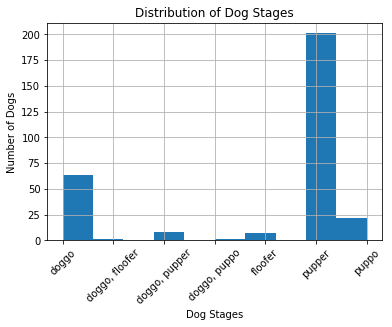

In [60]:
draw_hist(m_data['dog_stages'], 'Dog Stages', 'Number of Dogs', 'Distribution of Dog Stages')
